In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

path_to_folder = r"C:\Users\clara\Desktop\special_course\ds003838"

subnums = np.arange(32, 99, 1) # shouldn't it be to 99?
subnums = np.delete(subnums, np.where((subnums == 37) | (subnums == 66))) #shouldnt we remove 94 too?
subject_folders = [f'sub-0{i}' for i in subnums]

In [2]:
# Initialize an empty list to store DataFrames
all_subjects_events = []

for i in subject_folders:
    folder_path = os.path.join(path_to_folder, i, "pupil")
    filename = i + "_task-memory_events.tsv"
    file_path = os.path.join(folder_path, filename)

    # Read each CSV file into a DataFrame
    try:
        df = pd.read_csv(file_path, sep='\t', usecols=['timestamp', 'label'])
        all_subjects_events.append(df)
        
    except FileNotFoundError:
        print(f"File not found: {file_path}")

    except:
        print(file_path)

for i in all_subjects_events:
    print(i.head())

File not found: C:\Users\clara\Desktop\special_course\ds003838\sub-094\pupil\sub-094_task-memory_events.tsv
      timestamp   label
0  1.603518e+09  500113
1  1.603518e+09  500213
2  1.603518e+09  500313
3  1.603518e+09  500413
4  1.603518e+09  500513
      timestamp   label
0  1.603534e+09  500105
1  1.603534e+09  500205
2  1.603534e+09  500305
3  1.603534e+09  500405
4  1.603534e+09  500505
      timestamp   label
0  1.603702e+09  500109
1  1.603702e+09  500209
2  1.603702e+09  500309
3  1.603702e+09  500409
4  1.603702e+09  500509
      timestamp   label
0  1.603783e+09  500109
1  1.603783e+09  500209
2  1.603783e+09  500309
3  1.603783e+09  500409
4  1.603783e+09  500509
      timestamp   label
0  1.603795e+09  500109
1  1.603795e+09  500209
2  1.603795e+09  500309
3  1.603795e+09  500409
4  1.603795e+09  500509
      timestamp   label
0  1.604041e+09  500109
1  1.604041e+09  500209
2  1.604041e+09  500309
3  1.604041e+09  500409
4  1.604041e+09  500509
      timestamp   label
0  1

In [3]:
# Check the number of events for each subject
print(f"Number of subjects: {len(all_subjects_events)}")
for idx, df in enumerate(all_subjects_events):
    if df.shape[0] != 1458:
        print(f"Subject {subject_folders[idx]}: {df.shape}")

Number of subjects: 64
Subject sub-032: (1296, 2)
Subject sub-042: (1485, 2)
Subject sub-061: (1213, 2)


In [8]:
# Load the TSV file
file_path = r"C:\Users\clara\Desktop\special_course\ds003838\sub-042\pupil\sub-042_task-memory_events.tsv"
df = pd.read_csv(file_path, sep="\t")  # Read the TSV file

memory_map = {
    "05": np.zeros(5, dtype=int),
    "09": np.zeros(9, dtype=int),
    "13": np.zeros(13, dtype=int),
}

control_map = {
    "05": np.zeros(5, dtype=int),
    "09": np.zeros(9, dtype=int),
    "13": np.zeros(13, dtype=int),
}

for label in df["label"].astype(str):  # Convert entire column to string at once
    if label.startswith("60"):  # Ensure valid label
        load_position = int(label[2:4]) - 1  # 3rd and 4th digits (zero-indexed)
        category_key = label[4:6]  # 5th and 6th digits (05, 09, 13)

        if category_key in memory_map:
            memory_map[category_key][load_position] += 1  # Increment recall count

for label in df["label"].astype(str):  # Convert entire column to string at once
    if label.startswith("50"):  # Ensure valid label
        load_position = int(label[2:4]) - 1  # 3rd and 4th digits (zero-indexed)
        category_key = label[4:6]  # 5th and 6th digits (05, 09, 13)

        if category_key in control_map:
            control_map[category_key][load_position] += 1  # Increment control count

# Print results
print("Memory Condition (each should be 36):")
for key, array in memory_map.items():
    print(f"Category {key}:", array.tolist())  # Convert NumPy array to list for readability

print("Control Condition (each should be 18):")
for key, array in control_map.items():
    print(f"Category {key}:", array.tolist())  # Convert NumPy array to list for readability

Memory Condition (each should be 36):
Category 05: [36, 36, 36, 36, 36]
Category 09: [36, 36, 36, 36, 36, 36, 36, 36, 36]
Category 13: [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
Control Condition (each should be 18):
Category 05: [19, 19, 19, 19, 19]
Category 09: [19, 19, 19, 19, 19, 19, 19, 19, 19]
Category 13: [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]


In [22]:
# First number is the number of recalled items, second number is the total number of items
# Initialize a dictionary to store the number of recalled and total items for each category
category_map = {
    "05": np.zeros((5, 2), dtype=int),  # Shape (5,2) for recalled & total
    "09": np.zeros((9, 2), dtype=int),
    "13": np.zeros((13, 2), dtype=int),
}

for i in range(0, len(all_subjects_events)):
    for label in all_subjects_events[i]["label"].astype(str):  # Convert entire column to string at once
        if label.startswith("60"):  # Ensure valid label
            load_position = int(label[2:4]) - 1  # 3rd and 4th digits (zero-indexed)
            category_key = label[4:6]  # 5th and 6th digits (05, 09, 13)
            recall_flag = int(label[-1])  # Last digit (0 or 1)

            if category_key in category_map:
                category_map[category_key][load_position, 1] += 1  # Increment total count
                category_map[category_key][load_position, 0] += recall_flag  # Increment recalled count if recall_flag is 1

# Print results
for key, array in category_map.items():
    print(f"Category {key}:", array.tolist())  # Convert NumPy array to list for readability

Category 05: [[2243, 2296], [2147, 2296], [2046, 2296], [2027, 2296], [2067, 2296]]
Category 09: [[2035, 2294], [1729, 2294], [1432, 2294], [1194, 2294], [975, 2294], [740, 2294], [509, 2294], [312, 2294], [379, 2294]]
Category 13: [[1850, 2292], [1495, 2292], [1188, 2292], [989, 2292], [817, 2292], [619, 2292], [393, 2292], [276, 2292], [180, 2292], [110, 2292], [58, 2292], [30, 2292], [24, 2292]]


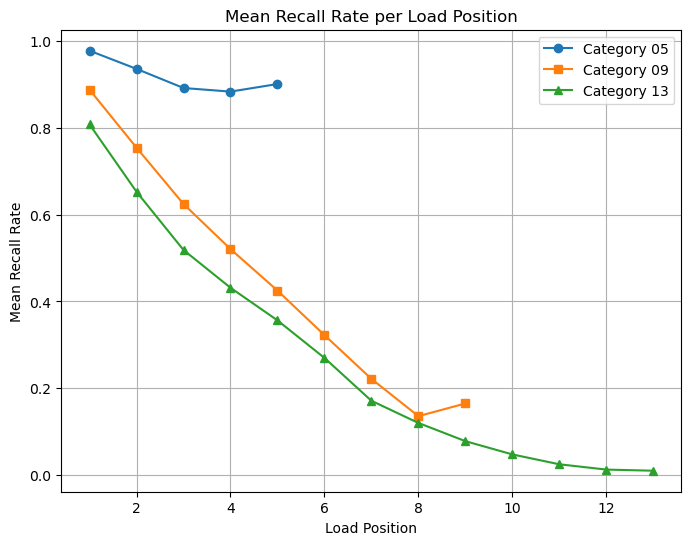

In [23]:
# Compute means using NumPy
means = {key: np.divide(array[:, 0], array[:, 1], where=array[:, 1] > 0) for key, array in category_map.items()}

# Create x-axis values
x_values = {key: np.arange(1, len(means[key]) + 1) for key in means}

# Plot the means for each category
plt.figure(figsize=(8, 6))
plt.plot(x_values["05"], means["05"], marker='o', linestyle='-', label='Category 05')
plt.plot(x_values["09"], means["09"], marker='s', linestyle='-', label='Category 09')
plt.plot(x_values["13"], means["13"], marker='^', linestyle='-', label='Category 13')

# Labels and title
plt.xlabel('Load Position')
plt.ylabel('Mean Recall Rate')
plt.title('Mean Recall Rate per Load Position')
plt.legend()
plt.grid(True)

# Show plot
plt.show()